<div style="text-align: center;">
    <div style="font-size: 28px;"><strong>Exoplanet Detection and Classification</strong></div>
    <div style="font-size: 15px;">Author: Kidus Kumbi</div>
</div>


<div style="text-align: center;">
    <img src="blackgif.gif">
</div>


**<span style="font-size: 1.6em">Table of Contents</span>** 
- Introduction
- Data Collection
- Data Processing
- Exploratory Analysis & Data Visualization
- Model: Analysis, Hypothesis Testing, & ML
- Interpretation: Insight & Policy Decision

<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Introduction</span>
</div>


**Overview**  
The study of exoplanets opens a fascinating window into the complexities of our universe, showcasing the diversity of planetary systems beyond our own solar system. By examining these distant worlds, we gain insights into their formation, composition, and potential habitability. Understanding these dynamics not only enriches our knowledge of planetary science but also provides valuable lessons for future space exploration and the search for extraterrestrial life.

**Importance of Studying Exoplanets**  
Exoplanet research has the potential to answer fundamental questions about the nature of our universe, the formation and evolution of planetary systems, and the possibility of life beyond Earth. The detection and classification of exoplanets are critical steps in this endeavor, helping scientists identify potential candidates for further study and exploration.

**Project Objectives**  
In this project, our primary goal is to classify exoplanet candidates using data science techniques, showcasing the complete data science lifecycle as an example to guide users. By leveraging datasets from missions such as Kepler and TESS, we will explore patterns and correlations that elucidate the characteristics of these distant planets. Our project will follow four main steps: data collection, data processing, exploratory analysis and data visualization, and model development including hypothesis testing and machine learning. Through this structured approach, we aim to provide a comprehensive analysis that highlights key drivers of exoplanet formation and classification. This not only advances our understanding of planetary systems but also serves as a detailed tutorial for users learning the data science process.


<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Data Collection</span>
</div>


**Introduction to Data Collection**  
Data collection is the first and arguably one of the most critical steps in the data science lifecycle. It involves gathering relevant data from various sources to form the foundation of our analysis and modeling efforts. For our project on exoplanet detection and classification, we rely on meticulously curated datasets provided by reputable organizations such as NASA and Caltech. These datasets contain observations and measurements collected by the Kepler mission, which has significantly contributed to our understanding of planetary systems beyond our Solar System.

**Data Source**:  
NASA Exoplanet Archive: This archive is a comprehensive repository of exoplanet data maintained by NASA and Caltech. It includes detailed measurements and observational data collected by the Kepler mission.  
[NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

**Overview of the Dataset**  
The dataset we are using for this project contains the following columns:
- KepID: Unique identifier for each Kepler observation.
- KOI Name: Name assigned to each Kepler Object of Interest (KOI).
- Kepler Name: Official name of the confirmed exoplanet (if available).
- Exoplanet Archive Disposition: Disposition provided by the Exoplanet Archive.
- Disposition Using Kepler Data: Disposition based on Kepler data alone.
- Disposition Score: Score indicating the likelihood of the observation being a real exoplanet.
- False Positive Flags: Not Transit-Like, Stellar Eclipse, Centroid Offset, Ephemeris Match.
- Orbital Parameters: Orbital Period (days), Transit Epoch (BKJD), Impact Parameter, Transit Duration (hours), Transit Depth (ppm), Planetary Radius (Earth radii), Equilibrium Temperature (K), Insolation Flux (Earth flux), Transit Signal-to-Noise Ratio.
- Stellar Parameters: Stellar Effective Temperature (K), Stellar Surface Gravity (log10(cm/s^2)), Stellar Radius (Solar radii).
- Positional Data: RA (Right Ascension), Dec (Declination).
- Kepler-band Magnitude.

**Data Collection Process**  
1. Accessing the Dataset: We access the NASA Exoplanet Archive to download the latest dataset of exoplanet observations. This dataset is updated regularly with new findings and refined measurements.
2. Data Integrity: Ensuring the integrity of the data is crucial. We validate the dataset by checking for completeness, accuracy, and consistency. Any anomalies or discrepancies are noted and addressed.

By collecting and preparing this data, we lay a solid foundation for the subsequent steps in our project, ensuring that our analyses and models are based on accurate and comprehensive information.

**Next Steps**  
With the data collection phase completed, we will move on to Data Processing, where we will clean, preprocess, and transform the data to make it suitable for analysis and modeling.


<div style="">
    <span style="font-size: 1.1em; font-weight: bold">Importing Necessary Libraries</span>
</div>

The main libraries we will use for this project are essential tools in the data science workflow. These libraries help in various stages, including data processing, exploratory data analysis, visualization, model building, and interpretation. Here’s a brief overview of the libraries and their roles:

Link the link to learn more about the libraries.
- [Pandas](https://pandas.pydata.org/docs/): For data manipulation and analysis. 
- [NumPy](https://numpy.org/doc/): For numerical operations and handling arrays.
- [MathPlotLib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/): For data visualization.
- [Scikit-learn](https://scikit-learn.org/stable/): For machine learning and hypothesis testing.
- [SciPy](https://docs.scipy.org/doc/scipy/): For advanced statistical operations.
- [TensorFlow](https://www.tensorflow.org/api_docs) and [Keras](https://keras.io/): For building and training neural networks.
Scikit-learn 

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from scipy.stats import norm
from sklearn import linear_model
from IPython.display import HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/var/folders/y_/hf68xh354pg8qm3sspq9qlnh0000gn/T/ipykernel_95249/1412750935.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Data Processing</span>
</div>

**Introduction to Data Processing**

Data processing is a crucial step in the data science lifecycle where raw data is transformed into a clean, structured format suitable for analysis. This phase involves cleaning the data, handling missing values, transforming variables, and preparing the data for the subsequent steps in the analysis pipeline. For our exoplanet detection and classification project, we will process the data collected from the NASA Exoplanet Archive to ensure it is ready for exploratory analysis and model building.

To learn more about Data Processing [Click here!](https://www.fullstory.com/blog/what-is-data-processing/#:~:text=Data%20processing%20is%20the%20series,sorting%2C%20and%20analyzing%20the%20data.)


In [2]:
# Load the dataset
file_path = 'exoplanets.csv'
exoplanets_df = pd.read_csv(file_path)

# Printing the shape of the train and test dataset
print(exoplanets_df.shape)
print('The shape of train data is: Row {} columns {}'.format(exoplanets_df.shape[0],exoplanets_df.shape[1]))


(9564, 49)
The shape of train data is: Row 9564 columns 49


In [3]:
# Display the first few rows of the dataset
exoplanets_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509












<div style=" text-style: lightblue">
    <div style="font-size: 15px;"><strong>  🌟 Fascinating Exoplanet Fact</strong></div>
    <div style="font-size: 14px;">HD 189733b is an exoplanet where it rains glass sideways at over 4,000 miles per hour due to its extreme winds. The planet’s deep blue color, similar to Earth's, is caused by the silicate particles in its atmosphere, making it one of the most visually striking and hostile worlds discovered.</div>
     <img src="189sec.gif">
</div>









**Let's rename the columns to make them readable**

For more description for each feature you can read more about them [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)


In [4]:
# Rename columns for better readability
exoplanets_df.rename(columns={
    'kepid': 'Kepler ID',
    'kepoi_name': 'KOI Name',
    'koi_disposition': 'Disposition',
    'koi_pdisposition': 'Kepler Disposition',
    'koi_score': 'Disposition Score',
    'koi_fpflag_nt': 'False Positive Not Transit-Like',
    'koi_fpflag_ss': 'False Positive Stellar Eclipse',
    'koi_fpflag_co': 'False Positive Centroid Offset',
    'koi_fpflag_ec': 'False Positive Ephemeris Match',
    'koi_period': 'Orbital Period (days)',
    'koi_period_err1': 'Orbital Period Upper Unc. (days)',
    'koi_period_err2': 'Orbital Period Lower Unc. (days)',
    'koi_time0bk': 'Transit Epoch (BKJD)',
    'koi_time0bk_err1': 'Transit Epoch Upper Unc. (BKJD)',
    'koi_time0bk_err2': 'Transit Epoch Lower Unc. (BKJD)',
    'koi_impact': 'Impact Parameter',
    'koi_impact_err1': 'Impact Parameter Upper Unc.',
    'koi_impact_err2': 'Impact Parameter Lower Unc.',
    'koi_duration': 'Transit Duration (hours)',
    'koi_duration_err1': 'Transit Duration Upper Unc. (hours)',
    'koi_duration_err2': 'Transit Duration Lower Unc. (hours)',
    'koi_depth': 'Transit Depth (ppm)',
    'koi_depth_err1': 'Transit Depth Upper Unc. (ppm)',
    'koi_depth_err2': 'Transit Depth Lower Unc. (ppm)',
    'koi_prad': 'Planetary Radius (Earth radii)',
    'koi_prad_err1': 'Planetary Radius Upper Unc. (Earth radii)',
    'koi_prad_err2': 'Planetary Radius Lower Unc. (Earth radii)',
    'koi_teq': 'Equilibrium Temperature (K)',
    'koi_teq_err1': 'Equilibrium Temperature Upper Unc. (K)',
    'koi_teq_err2': 'Equilibrium Temperature Lower Unc. (K)',
    'koi_insol': 'Insolation Flux (Earth flux)',
    'koi_insol_err1': 'Insolation Flux Upper Unc. (Earth flux)',
    'koi_insol_err2': 'Insolation Flux Lower Unc. (Earth flux)',
    'koi_model_snr': 'Transit Signal-to-Noise Ratio',
    'koi_steff': 'Stellar Effective Temperature (K)',
    'koi_steff_err1': 'Stellar Effective Temperature Upper Unc. (K)',
    'koi_steff_err2': 'Stellar Effective Temperature Lower Unc. (K)',
    'koi_slogg': 'Stellar Surface Gravity (log10(cm/s^2))',
    'koi_slogg_err1': 'Stellar Surface Gravity Upper Unc. (log10(cm/s^2))',
    'koi_slogg_err2': 'Stellar Surface Gravity Lower Unc. (log10(cm/s^2))',
    'koi_srad': 'Stellar Radius (Solar radii)',
    'koi_srad_err1': 'Stellar Radius Upper Unc. (Solar radii)',
    'koi_srad_err2': 'Stellar Radius Lower Unc. (Solar radii)',
    'ra': 'Right Ascension (RA)',
    'dec': 'Declination (Dec)',
    'koi_kepmag': 'Kepler Magnitude'
}, inplace=True)

**Handling Missing Values**: Check for and handle any missing values in the dataset. This might involve filling missing values with appropriate statistics (mean, median, etc.) or removing rows/columns with significant missing data.


In [5]:
#Checking for missing values
exoplanets_df.isnull().sum()

Kepler ID                                                0
KOI Name                                                 0
kepler_name                                           7205
Disposition                                              0
Kepler Disposition                                       0
Disposition Score                                     1510
False Positive Not Transit-Like                          0
False Positive Stellar Eclipse                           0
False Positive Centroid Offset                           0
False Positive Ephemeris Match                           0
Orbital Period (days)                                    0
Orbital Period Upper Unc. (days)                       454
Orbital Period Lower Unc. (days)                       454
Transit Epoch (BKJD)                                     0
Transit Epoch Upper Unc. (BKJD)                        454
Transit Epoch Lower Unc. (BKJD)                        454
Impact Parameter                                       3

In [6]:
# Drop columns with the highest number of missing values
columns_to_drop = ['Equilibrium Temperature Upper Unc. (K)', 'Equilibrium Temperature Lower Unc. (K)', 'kepler_name']
exoplanets_df.drop(columns=columns_to_drop, inplace=True)

# Identify numerical columns
numeric_columns = exoplanets_df.select_dtypes(include=[np.number]).columns

# Impute missing values in numerical columns with the mean
exoplanets_df[numeric_columns] = exoplanets_df[numeric_columns].fillna(exoplanets_df[numeric_columns].mean())

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
exoplanets_df.head()


First few rows of the cleaned dataset:


,Kepler ID,KOI Name,Disposition,Kepler Disposition,Disposition Score,False Positive Not Transit-Like,False Positive Stellar Eclipse,False Positive Centroid Offset,False Positive Ephemeris Match,Orbital Period (days),...,Stellar Effective Temperature Lower Unc. (K),Stellar Surface Gravity (log10(cm/s^2)),Stellar Surface Gravity Upper Unc. (log10(cm/s^2)),Stellar Surface Gravity Lower Unc. (log10(cm/s^2)),Stellar Radius (Solar radii),Stellar Radius Upper Unc. (Solar radii),Stellar Radius Lower Unc. (Solar radii),Right Ascension (RA),Declination (Dec),Kepler Magnitude
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


<div style="text-align: center;">
    <img src="sam.gif">
</div>

<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Exploratory Analysis & Data Visualization</span>
</div>

Exploratory Data Analysis (EDA) is a crucial step in the data science lifecycle. It involves examining datasets to summarize their main characteristics, often employing visual methods. This phase is essential for understanding the data's structure, detecting patterns, spotting anomalies, and checking assumptions.

**Objectives of EDA:**

1. Understand Data Distribution: Identify the distribution of individual features, such as mean, median, variance, skewness, and kurtosis.
2. Identify Relationships: Explore relationships between different variables to find potential correlations or causations.
3. Detect Outliers: Find anomalies or outliers that could skew analysis.
4. Generate Hypotheses: Formulate hypotheses that can be tested in subsequent modeling phases.

Data Visualization complements EDA by providing a visual representation of the data, making it easier to understand and interpret. Visualizations help in identifying patterns, trends, and insights that are not immediately apparent in raw data.

EDA and data visualization are fundamental steps that bridge the gap between data collection and model building. By thoroughly exploring and visualizing the data, data scientists can make informed decisions about feature engineering, model selection, and parameter tuning. This phase ensures that the data used for modeling is well-understood and appropriately prepared, ultimately leading to more accurate and reliable models.

To learn more about EDA and data visualization [Click here!](https://www.codecademy.com/article/eda-data-visualization)


**As our first step, Let's perform the three analyses step by step: descriptive statistics, correlation analysis, and class distribution analysis.**

In [7]:
# Identify the key features for summary statistics
key_features = [
    'Disposition Score', 
    'Orbital Period (days)', 
    'Planetary Radius (Earth radii)', 
    'Stellar Effective Temperature (K)'
]

# Display summary statistics for key numerical features in table format
print("Summary Statistics for Key Features:")
display(exoplanets_df[key_features].describe().transpose())


Summary Statistics for Key Features:


,count,mean,std,min,25%,50%,75%,max
Disposition Score,9564.0,0.480829,0.437658,0.000000,0.000000,0.480829,0.995000,1.0000
Orbital Period (days),9564.0,75.671358,1334.744046,0.241843,2.733684,9.752831,40.715178,129995.7784
Planetary Radius (Earth radii),9564.0,102.891778,3018.662296,0.080000,1.430000,2.490000,21.712500,200346.0000
Stellar Effective Temperature (K),9564.0,5706.823280,781.587750,2661.000000,5333.000000,5745.000000,6099.000000,15896.0000


<span style="color: lightblue;"><strong>Summary Statistics for Key Features:</strong></span>

- Disposition Score: This feature shows a wide range of values with a mean close to 0.5, indicating variability in the likelihood of an observation being a real exoplanet.
- Orbital Period (days): The wide range and high standard deviation indicate that exoplanets have a diverse set of orbital periods, with some having very long orbital periods.
- Planetary Radius (Earth radii): There are significant variations in planetary sizes, from Earth-sized planets to those much larger.
- Stellar Effective Temperature (K): Most host stars have temperatures around 5700K, similar to our Sun, but with some variability.

**We will calculate the correlation matrix for the numerical features to identify strong correlations.**

In [8]:
# Calculate correlation matrix for numerical features only
numeric_features = exoplanets_df.select_dtypes(include=[np.number])

# Display the correlation matrix
correlation_matrix = numeric_features.corr()
print("Correlation Matrix:")
display(correlation_matrix.head())


Correlation Matrix:


,Kepler ID,Disposition Score,False Positive Not Transit-Like,False Positive Stellar Eclipse,False Positive Centroid Offset,False Positive Ephemeris Match,Orbital Period (days),Orbital Period Upper Unc. (days),Orbital Period Lower Unc. (days),Transit Epoch (BKJD),...,Stellar Effective Temperature Lower Unc. (K),Stellar Surface Gravity (log10(cm/s^2)),Stellar Surface Gravity Upper Unc. (log10(cm/s^2)),Stellar Surface Gravity Lower Unc. (log10(cm/s^2)),Stellar Radius (Solar radii),Stellar Radius Upper Unc. (Solar radii),Stellar Radius Lower Unc. (Solar radii),Right Ascension (RA),Declination (Dec),Kepler Magnitude
Kepler ID,1.000000,0.087421,0.008139,-0.048630,-0.098636,-0.044213,0.011511,0.011345,-0.011345,0.013620,...,0.003045,0.051274,-0.026020,-0.023479,-0.026661,-0.027154,0.024084,-0.002288,0.993587,0.017521
Disposition Score,0.087421,1.000000,-0.006979,-0.534735,-0.487680,-0.384220,-0.004200,-0.054104,0.054104,-0.006490,...,0.315365,0.136824,-0.152166,0.168197,-0.069885,-0.103322,0.073717,-0.155436,0.087169,0.038291
False Positive Not Transit-Like,0.008139,-0.006979,1.000000,-0.023270,-0.004575,0.000576,0.001554,0.021199,-0.021199,0.016143,...,-0.011201,-0.001982,-0.001589,-0.006559,0.000393,0.002640,-0.001159,0.012693,0.007914,-0.003753
False Positive Stellar Eclipse,-0.048630,-0.534735,-0.023270,1.000000,0.151233,0.096539,-0.020557,-0.134401,0.134401,-0.117435,...,-0.172346,-0.075403,0.121204,-0.042845,0.046748,0.050167,-0.044772,0.086374,-0.048116,0.000628
False Positive Centroid Offset,-0.098636,-0.487680,-0.004575,0.151233,1.000000,0.523851,-0.020804,-0.090568,0.090568,-0.123592,...,-0.109935,-0.018756,-0.007335,-0.050051,0.041256,0.037430,-0.030406,0.159923,-0.097175,0.060591


<span style="color: lightblue;"><strong>Correlation Matrix:</strong></span>

- Disposition Score shows a moderate negative correlation with False Positive Stellar Eclipse and a moderate positive correlation with Transit Signal-to-Noise Ratio, indicating that higher signal-to-noise ratios are associated with higher likelihoods of confirmed exoplanets.
- Planetary Radius is positively correlated with Transit Depth, which makes sense because larger planets block more starlight.
- Stellar Effective Temperature shows a moderate correlation with Equilibrium Temperature, suggesting that the temperature of the host star affects the equilibrium temperature of the planet.

**We will analyze the distribution of the target variable (Disposition) to understand the balance between different classes.**

In [9]:
# Analyze the distribution of the target variable 'Disposition'
class_distribution = exoplanets_df['Disposition'].value_counts()

# Display the class distribution
print("Class Distribution for 'Disposition':")
display(class_distribution)


Class Distribution for 'Disposition':


Disposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

<span style="color: lightblue;"><strong>Class Distribution for 'Disposition':</strong></span>

The dataset contains a relatively balanced number of CONFIRMED and CANDIDATE exoplanets, but a higher number of FALSE POSITIVE observations. This indicates the necessity for effective classification models to differentiate between real exoplanets and false positives.

Let's create four visualizations to analyze and explore the exoplanet dataset. We'll use Matplotlib and Seaborn to achieve this.

**Visualization 1: Histogram of Disposition Score**

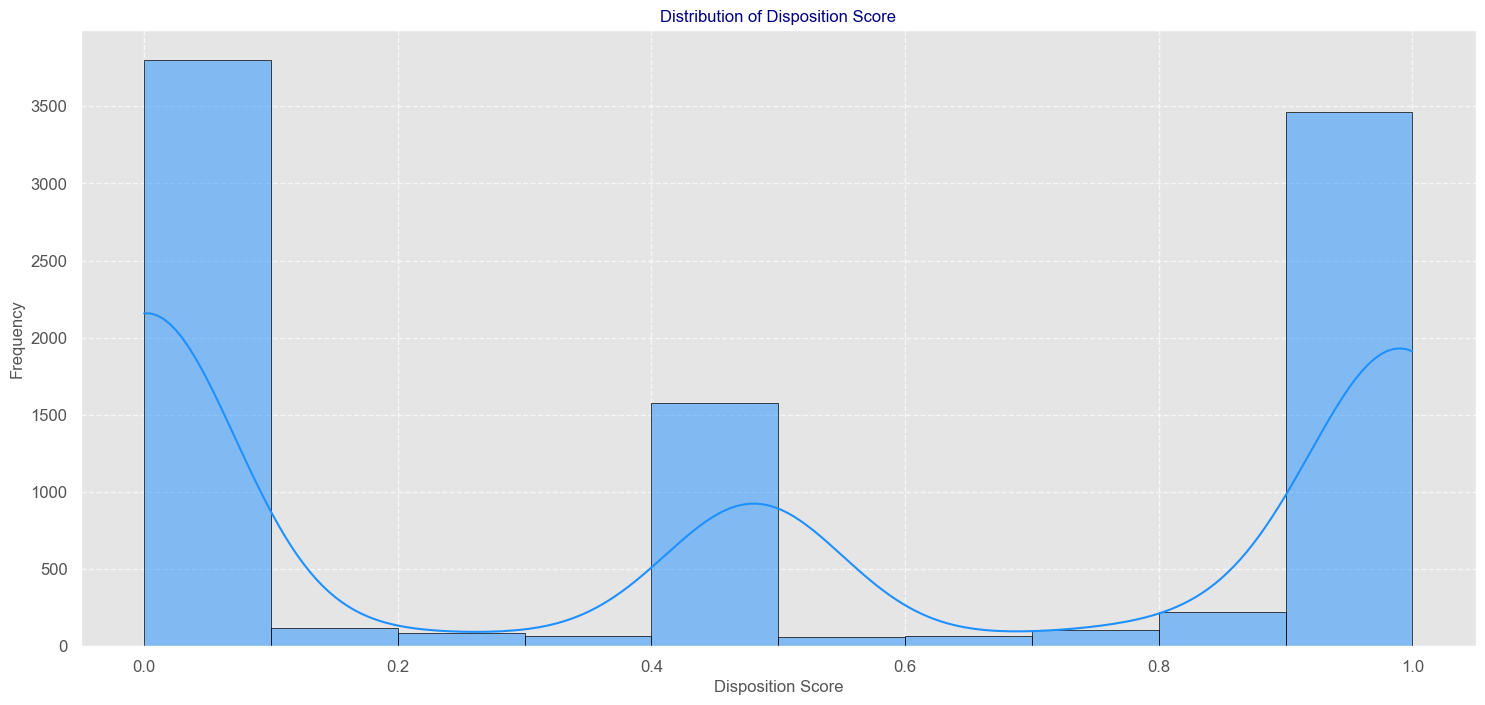

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')  

# Histogram of Disposition Score
plt.figure(figsize=(18, 8))
sns.histplot(exoplanets_df['Disposition Score'], kde=True, bins=10, color='dodgerblue', edgecolor='black')
plt.title('Distribution of Disposition Score', fontsize=12, color='navy')
plt.xlabel('Disposition Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The disposition scores are clustered around 0 and 1, suggesting many observations are either highly likely or unlikely to be exoplanets, with fewer ambiguous cases.


**Visualization 2: Box Plot of Planetary Radius by Disposition**

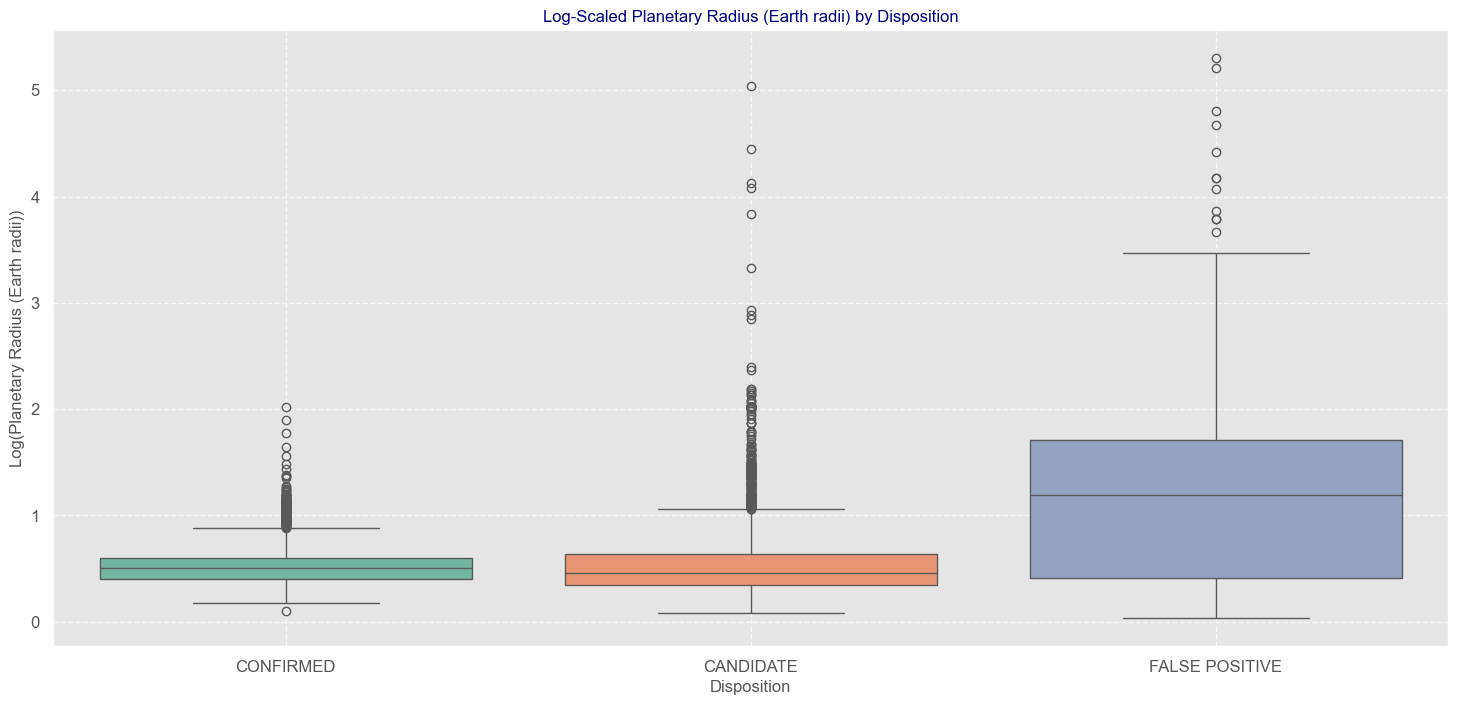

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Adding a small constant to avoid log(0) which is undefined
exoplanets_df['Log Planetary Radius (Earth radii)'] = np.log10(exoplanets_df['Planetary Radius (Earth radii)'] + 1)

# Box plot of Log-Scaled Planetary Radius by Disposition
plt.figure(figsize=(18, 8))
sns.boxplot(x='Disposition', y='Log Planetary Radius (Earth radii)', data=exoplanets_df, palette='Set2')
plt.title('Log-Scaled Planetary Radius (Earth radii) by Disposition', fontsize=12, color='navy')
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Log(Planetary Radius (Earth radii))', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The box plot indicates that confirmed exoplanets generally have smaller radii compared to false positives, which often have outliers with extremely large radii. This suggests that unusually large planetary radii might be a characteristic of false positives.


**Visualization 3: Scatter Plot of Orbital Period vs. Planetary Radius**

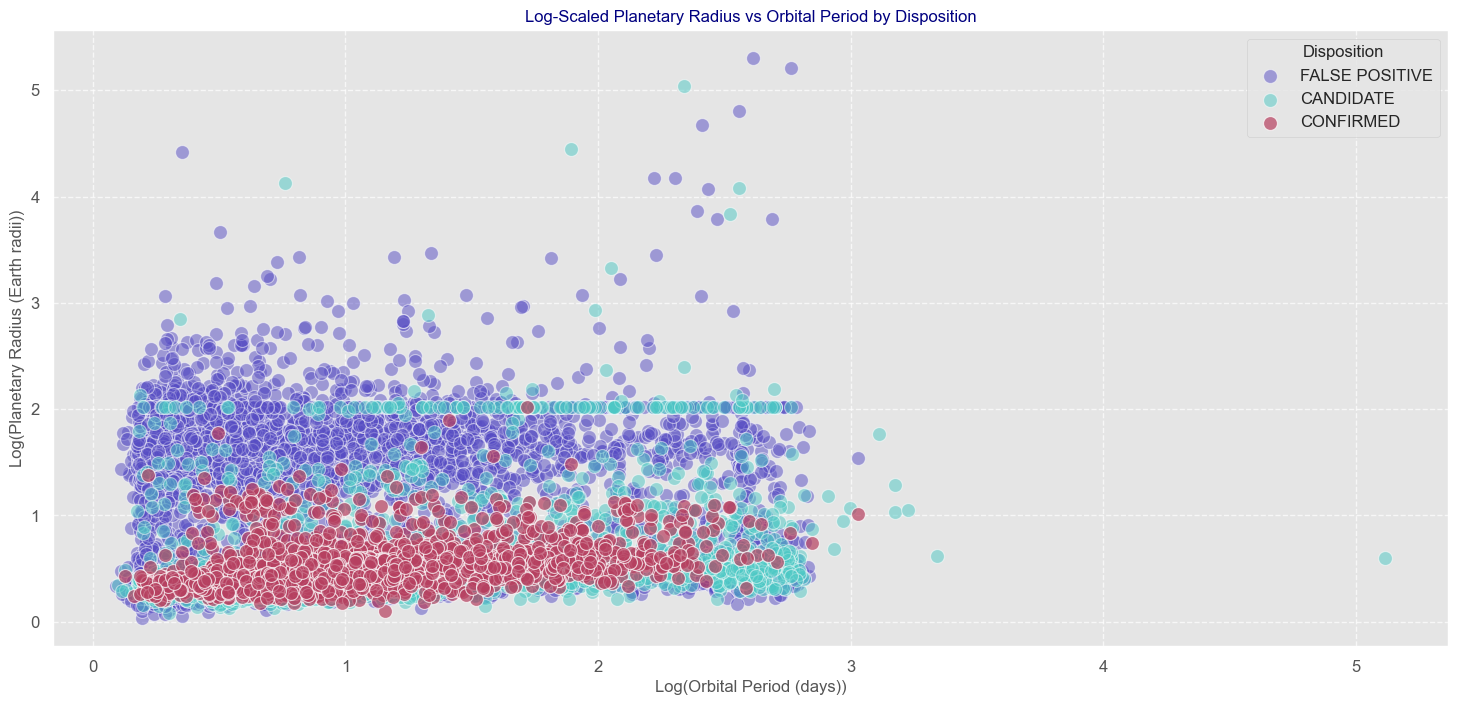

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Define custom palette with specified colors
palette = {
    'CONFIRMED': '#B64060',
    'CANDIDATE': '#4DC9C5',
    'FALSE POSITIVE': '#574DC4'
}

# Scatter plot of Orbital Period vs. Planetary Radius
plt.figure(figsize=(18, 8))
sns.scatterplot(
    x=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'FALSE POSITIVE']['Orbital Period (days)'] + 1),
    y=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'FALSE POSITIVE']['Planetary Radius (Earth radii)'] + 1),
    color=palette['FALSE POSITIVE'],
    label='FALSE POSITIVE',
    s=100,
    alpha=0.5
)
sns.scatterplot(
    x=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'CANDIDATE']['Orbital Period (days)'] + 1),
    y=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'CANDIDATE']['Planetary Radius (Earth radii)'] + 1),
    color=palette['CANDIDATE'],
    label='CANDIDATE',
    s=100,
    alpha=0.5
)
sns.scatterplot(
    x=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'CONFIRMED']['Orbital Period (days)'] + 1),
    y=np.log10(exoplanets_df[exoplanets_df['Disposition'] == 'CONFIRMED']['Planetary Radius (Earth radii)'] + 1),
    color=palette['CONFIRMED'],
    label='CONFIRMED',
    s=100,
    alpha=0.7  
)
plt.title('Log-Scaled Planetary Radius vs Orbital Period by Disposition', fontsize=12, color='navy')
plt.xlabel('Log(Orbital Period (days))', fontsize=12)
plt.ylabel('Log(Planetary Radius (Earth radii))', fontsize=12)
plt.legend(title='Disposition', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The scatter plot reveals that most exoplanets (confirmed or candidates) have smaller radii and shorter orbital periods. There are a few outliers with extremely long orbital periods and large radii, which are mostly false positives.

**Visualization 4: Heatmap of Correlation Matrix**

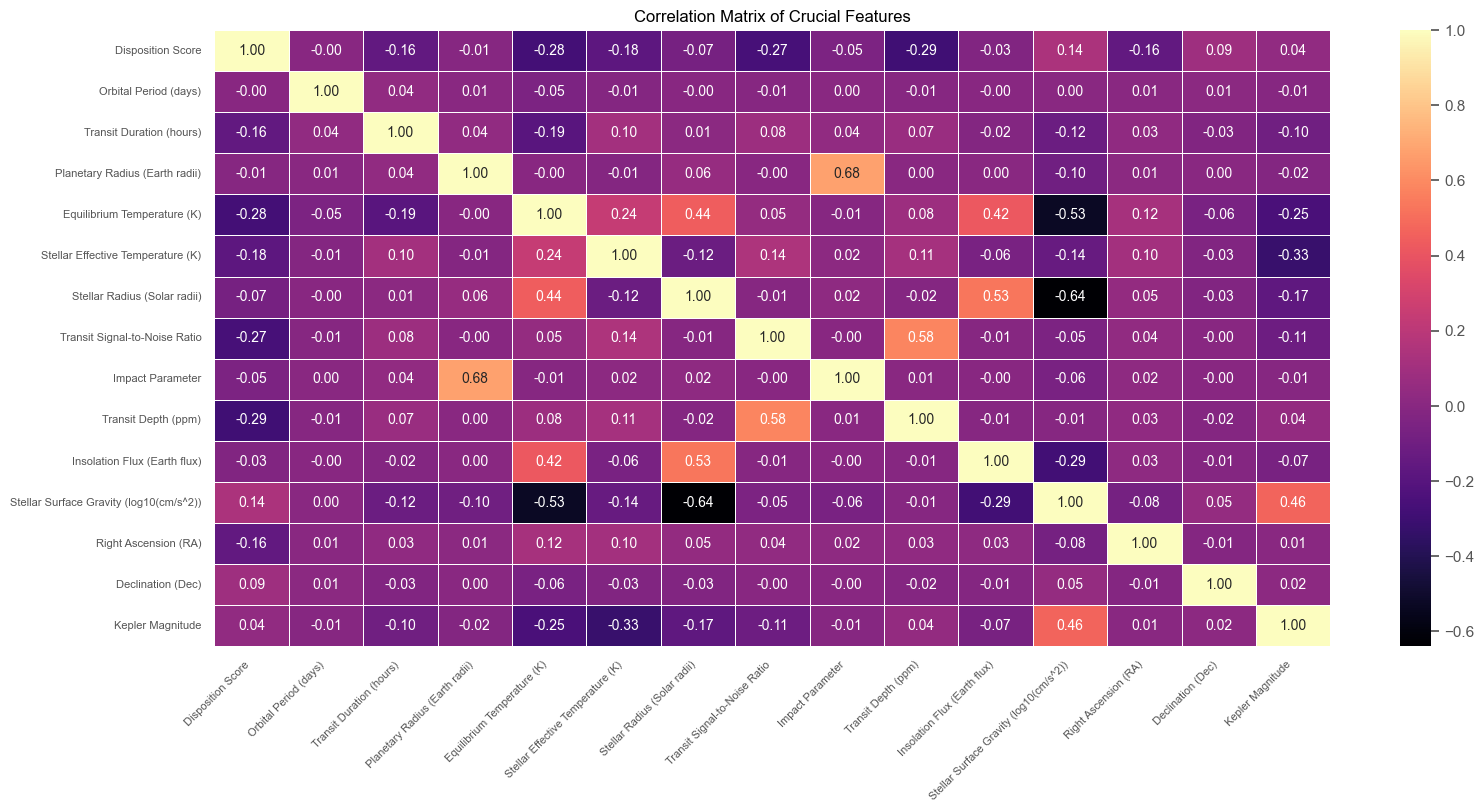

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the best 15 numerical features
selected_features = ['Disposition Score', 'Orbital Period (days)', 'Transit Duration (hours)',
                     'Planetary Radius (Earth radii)', 'Equilibrium Temperature (K)',
                     'Stellar Effective Temperature (K)', 'Stellar Radius (Solar radii)',
                     'Transit Signal-to-Noise Ratio', 'Impact Parameter', 'Transit Depth (ppm)',
                     'Insolation Flux (Earth flux)', 'Stellar Surface Gravity (log10(cm/s^2))',
                     'Right Ascension (RA)', 'Declination (Dec)', 'Kepler Magnitude']

# Filter the DataFrame to keep only the selected features
numeric_features = exoplanets_df[selected_features]

# Calculate correlation matrix for selected numerical features
correlation_matrix = numeric_features.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Crucial Features', fontsize=12, color='black')
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.show()


The heatmap visualizes the correlations among selected crucial features, confirming the numerical correlations. Notably, the strong correlation between Transit Signal-to-Noise Ratio and Disposition Score highlights the importance of signal quality in confirming exoplanets.


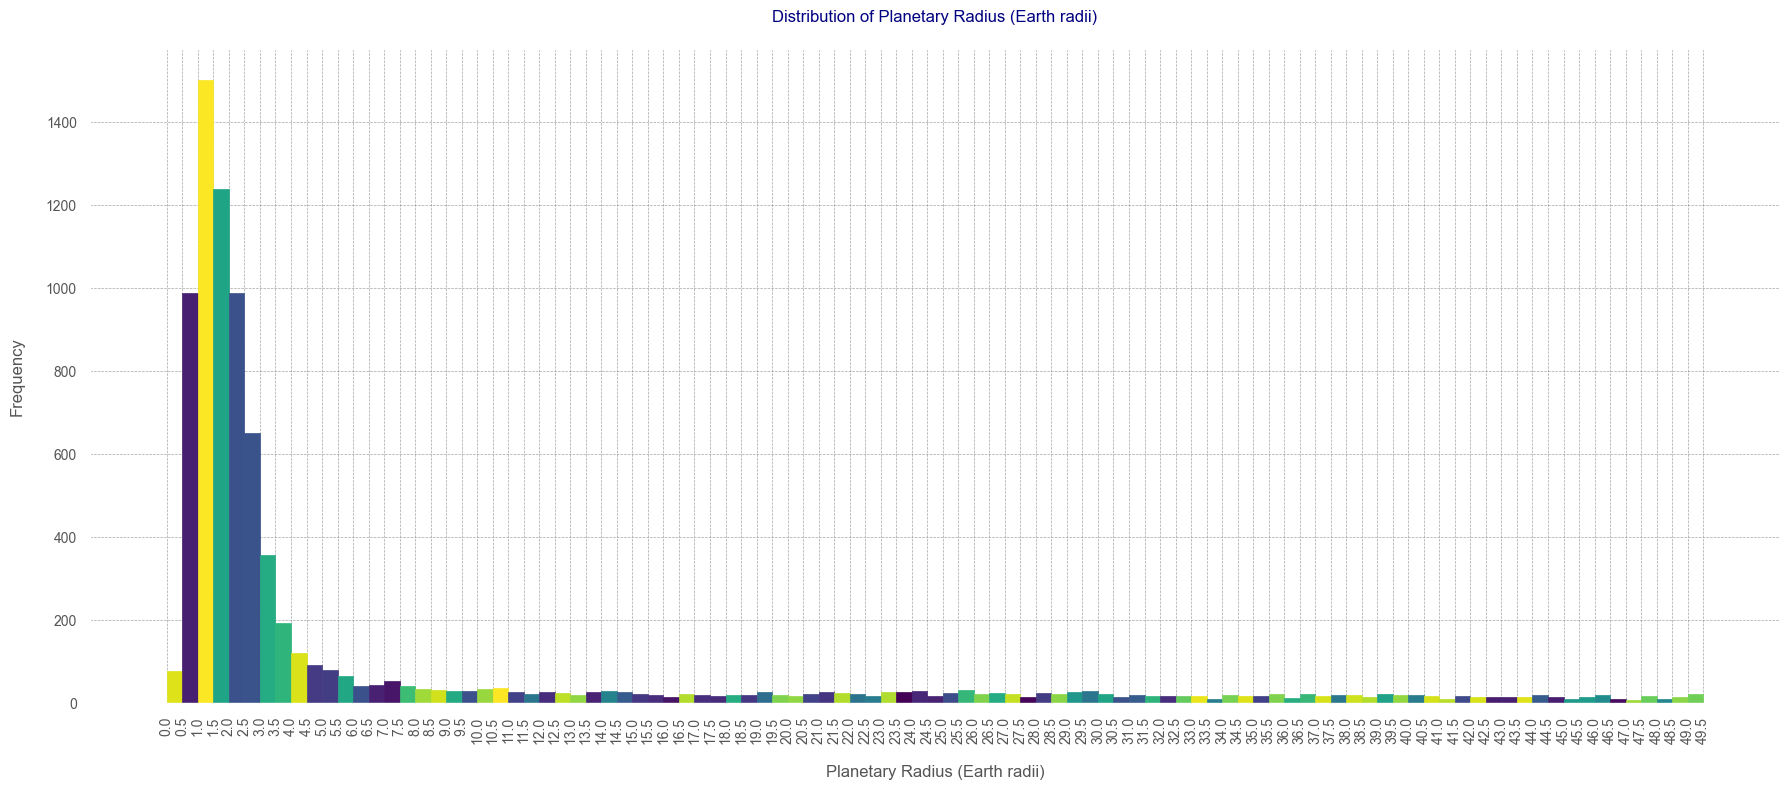

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(18, 8))

# Filter the dataset to remove extreme outliers for better visualization
filtered_df = exoplanets_df[exoplanets_df['Planetary Radius (Earth radii)'] < 50]

# Plot the distribution of Planetary Radius with log-transformed x-axis values
sns.histplot(filtered_df['Planetary Radius (Earth radii)'], kde=False, bins=np.arange(0, 50, 0.5), color='dodgerblue', edgecolor='black')

# Add more colors for the bars
for bar in plt.gca().patches:
    bar.set_color(plt.cm.viridis(np.random.uniform(0, 1)))

# Customize the title, labels, and gridlines
plt.title('Distribution of Planetary Radius (Earth radii)', fontsize=12, color='navy', pad=20)
plt.xlabel('Planetary Radius (Earth radii)', fontsize=12, labelpad=15)
plt.ylabel('Frequency', fontsize=12, labelpad=15)
plt.xticks(np.arange(0, 50, 0.5), fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()


The histogram shows that the distribution of planetary radii is heavily skewed to the left, indicating that most exoplanets have radii close to Earth's radius. A significant majority of the exoplanets in the dataset have radii less than 10 Earth radii, highlighting a predominance of smaller planets. The presence of larger planets (greater than 10 Earth radii) is rare in the dataset, suggesting that massive exoplanets are less common.

**Now let's examine distribution of orbital period**

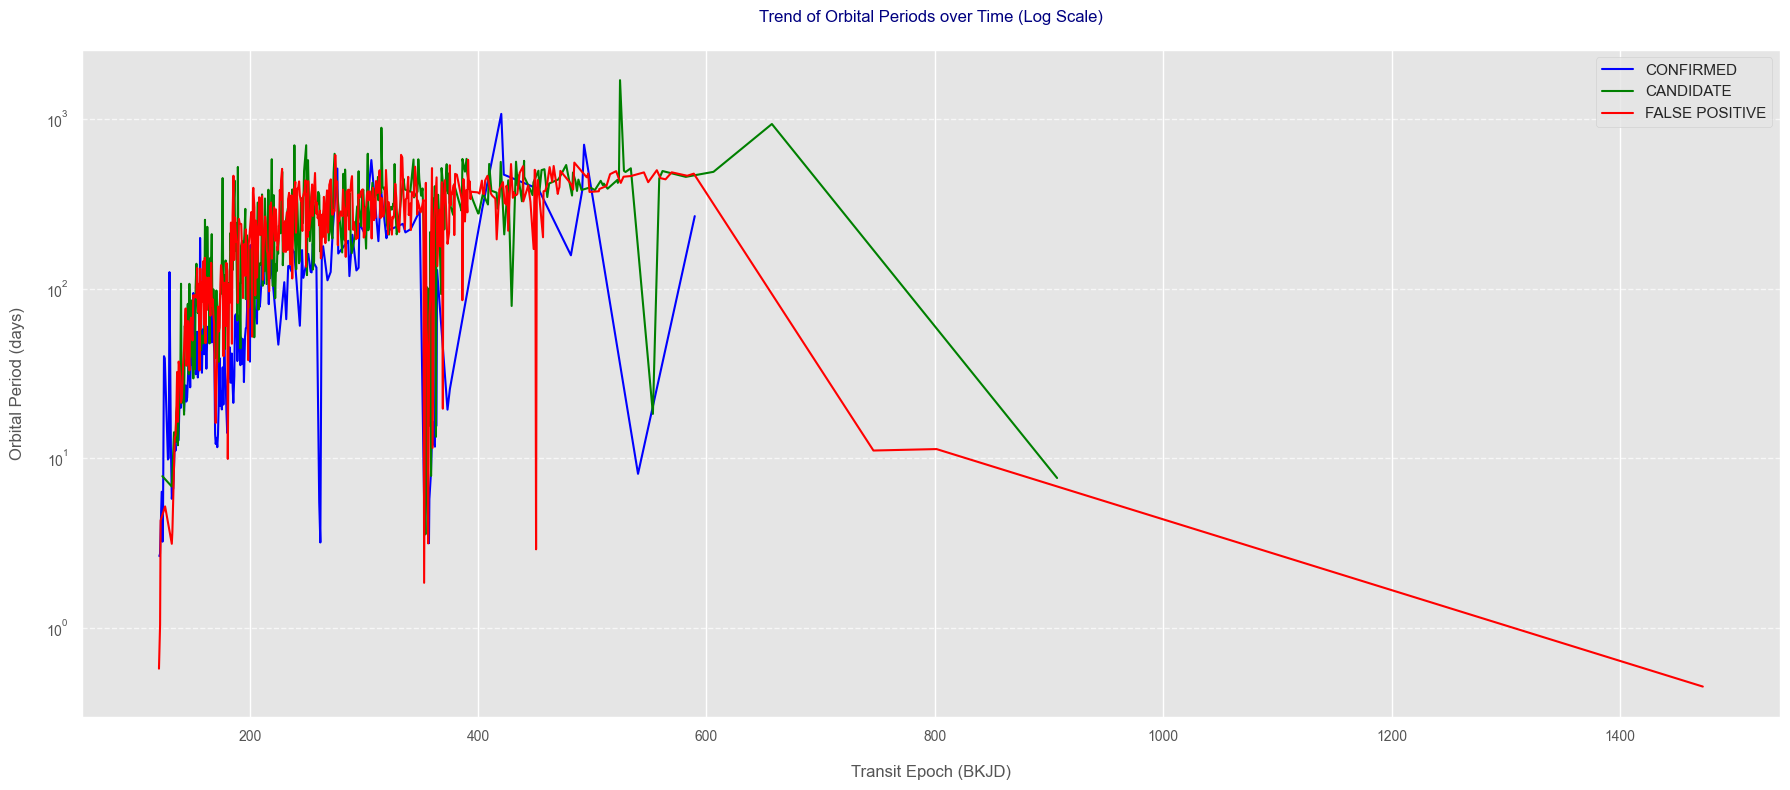

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming exoplanets_df is already defined and cleaned
# Filter out extreme outliers for better visualization
filtered_df = exoplanets_df[exoplanets_df['Orbital Period (days)'] < 10000]

# Create a bin for Transit Epoch to aggregate data
filtered_df['Epoch Bin'] = pd.cut(filtered_df['Transit Epoch (BKJD)'], bins=2000, labels=False)

# Aggregate data by calculating mean orbital period for each bin and disposition
binned_data = filtered_df.groupby(['Epoch Bin', 'Disposition']).agg({'Orbital Period (days)': 'mean', 'Transit Epoch (BKJD)': 'mean'}).reset_index()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the line plot with log-transformed y-axis
sns.lineplot(x='Transit Epoch (BKJD)', y='Orbital Period (days)', data=binned_data[binned_data['Disposition'] == 'CONFIRMED'], label='CONFIRMED', color='blue')
sns.lineplot(x='Transit Epoch (BKJD)', y='Orbital Period (days)', data=binned_data[binned_data['Disposition'] == 'CANDIDATE'], label='CANDIDATE', color='green')
sns.lineplot(x='Transit Epoch (BKJD)', y='Orbital Period (days)', data=binned_data[binned_data['Disposition'] == 'FALSE POSITIVE'], label='FALSE POSITIVE', color='red')
plt.yscale('log')

# Customize the title, labels, and gridlines
plt.title('Trend of Orbital Periods over Time (Log Scale)', fontsize=12, color='navy', pad=20)
plt.xlabel('Transit Epoch (BKJD)', fontsize=12, labelpad=15)
plt.ylabel('Orbital Period (days)', fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


The confirmed, candidate, and false positive exoplanets show a similar trend in their orbital periods over time. Initially, there is an increase in the orbital period, which stabilizes and then decreases for all dispositions. There are noticeable peaks at certain epochs, suggesting periods when larger orbital periods were more frequently detected. This might be due to the observational capabilities or the discovery methods employed at those times.

<span style="color: lightblue;"><strong>Understanding Transit Epoch BKJD:</strong></span>

- Transit Event: A transit event occurs when an exoplanet passes in front of its host star as seen from Earth, causing a temporary dip in the star's brightness. The timing of this event is crucial for determining the orbital characteristics of the exoplanet.

- Barycentric Kepler Julian Date (BKJD): BKJD is a time system used in the Kepler mission. It is based on the Julian Date (JD) but corrected for the barycenter of the Solar System and offset by 2,454,833 days. This correction ensures more precise time measurements for the positions and motions of celestial objects observed by Kepler.

**What about Distribution of Equilibrium Temperature?**

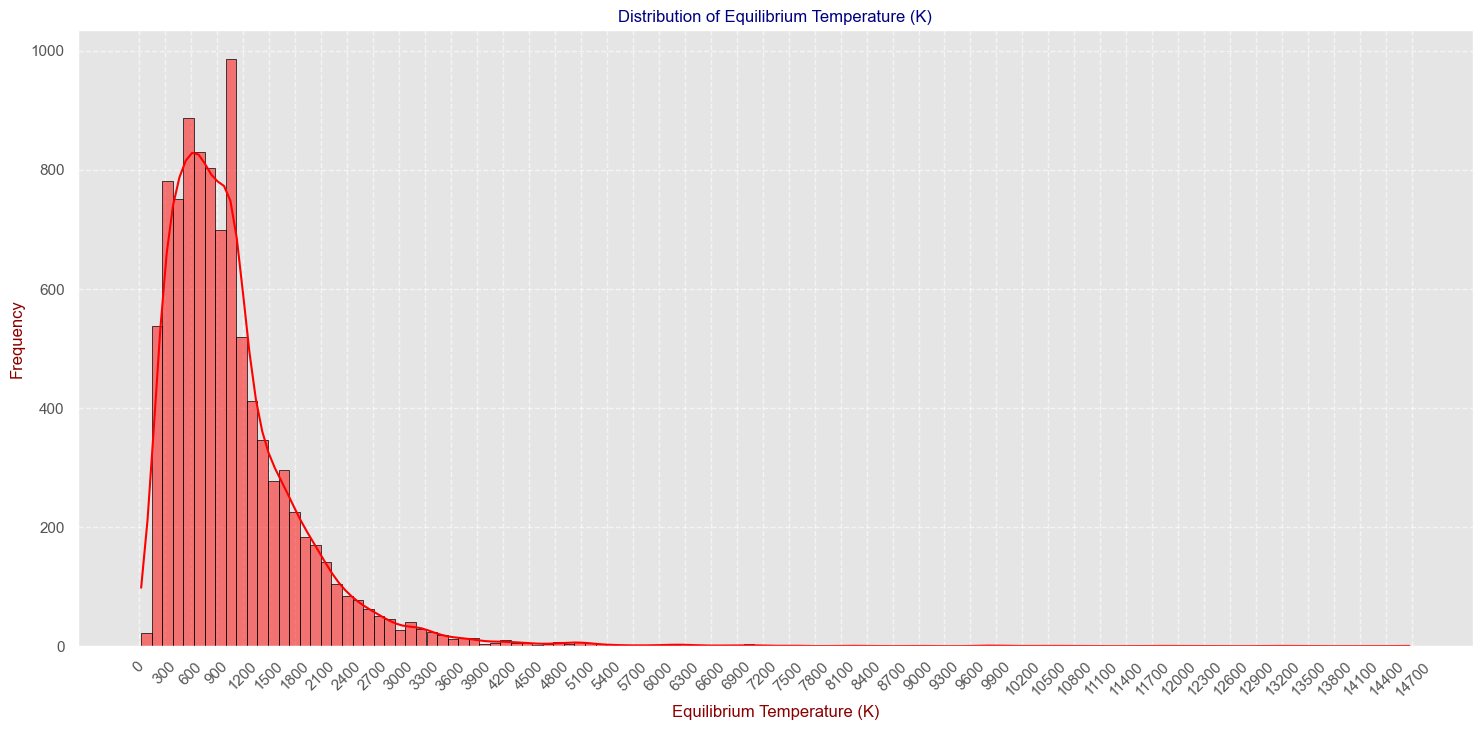

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced visualization for the Distribution of Equilibrium Temperature
plt.figure(figsize=(18, 8))
sns.histplot(exoplanets_df['Equilibrium Temperature (K)'], kde=True, bins=120, color='red', edgecolor='black')
plt.xticks(range(0, 15000, 300), rotation=45)
plt.title('Distribution of Equilibrium Temperature (K)', fontsize=12, color='navy')
plt.xlabel('Equilibrium Temperature (K)', fontsize=12, color='darkred')
plt.ylabel('Frequency', fontsize=12, color='darkred')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The distribution of equilibrium temperatures for the exoplanets in our dataset reveals a right-skewed pattern, with the majority of planets having lower equilibrium temperatures. This suggests that most exoplanets detected by the Kepler mission have relatively cool temperatures

<div style="text-align: center;">
    <img src="exo2.webp" width="1000" height="400">
</div>


<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Model: Analysis, Hypothesis Testing, & ML</span>
</div>

The fourth stage of our data science project involves building and evaluating machine learning models. This stage is crucial as it translates the insights derived from data into actionable predictions and decisions.

**Introduction to the Stage**

In the "Model: Analysis, Hypothesis Testing, & ML" stage, we aim to apply statistical and machine learning techniques to analyze our data, validate hypotheses, and build predictive models. This process involves several key steps, including:

- Data Splitting: Dividing the dataset into training and testing subsets to ensure the model's performance is evaluated on unseen data.
- Feature Selection and Engineering: Identifying and transforming the most relevant features to improve model performance.
- Model Selection: Choosing appropriate machine learning algorithms based on the problem type and data characteristics.
- -Training: Fitting the model to the training data.
- Evaluation: Assessing the model's performance using various metrics and validating its predictive power.
- Hyperparameter Tuning: Optimizing model parameters to enhance performance.
- Hypothesis Testing: Conducting statistical tests to validate assumptions and findings.

**Objectives for This Project**

For our exoplanet detection and classification project, we will:

- Split the Dataset: We will divide the dataset into training and testing subsets to ensure robust evaluation.
- Select and Engineer Features: We'll refine our feature set to include the most impactful variables for the model.
- Build and Train Models: Using algorithms such as Logistic Regression, Random Forest, and Gradient Boosting, we will build models to classify exoplanet candidates.
- Evaluate and Tune Models: We will assess the models using metrics like accuracy, precision, recall, and the F1 score, and perform hyperparameter tuning to optimize them.
- Validate Findings: Conduct hypothesis tests to confirm the statistical significance of our results.

By following these steps, we aim to develop a robust machine learning model that can accurately predict whether an observation is a real exoplanet candidate. This stage will not only demonstrate our analytical and coding skills but also ensure our findings are reliable and actionable.

To learn more about Analysis, Hypothesis Testing, & ML [Click here!](https://www.datacamp.com/tutorial/hypothesis-testing-machine-learning)


In [17]:
# Drop 'KepID' and 'KOIName' columns
exoplanets_df.drop(columns=['Kepler ID', 'KOI Name'], inplace=True)

**First, we'll encode the categorical variables and the target variable before splitting the data.**

In [18]:
# Correct encoding of the target variable
target = exoplanets_df['Disposition'].apply(lambda x: 1 if x == 'CANDIDATE' else (2 if x == 'CONFIRMED' else 0))

# Check the distribution of the original target variable
print("Original target variable distribution:")
print(exoplanets_df['Disposition'].value_counts())

# Check the distribution of the encoded target variable
print("Encoded target variable distribution:")
print(target.value_counts())


Original target variable distribution:
Disposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64
Encoded target variable distribution:
Disposition
0    4840
1    2367
2    2357
Name: count, dtype: int64


**Correcting the Data Splitting**

Now we will perform the data splitting, ensuring the target variable retains its class distinctions.

In [19]:
from sklearn.model_selection import train_test_split

# Encode the categorical variables using get_dummies
features = exoplanets_df.drop(columns=['Disposition'])
encoded_features = pd.get_dummies(features, drop_first=True)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.3, random_state=42, stratify=target)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Check the distribution of the target variable in the training set
print("Training target variable distribution:")
print(y_train.value_counts())

# Check the distribution of the target variable in the testing set
print("Testing target variable distribution:")
print(y_test.value_counts())


Training data shape: (6694, 45)
Testing data shape: (2870, 45)
Training target variable distribution:
Disposition
0    3387
1    1657
2    1650
Name: count, dtype: int64
Testing target variable distribution:
Disposition
0    1453
1     710
2     707
Name: count, dtype: int64


**Model Training and Evaluation**

Now that the target variable is correctly encoded and the data split retains class distinctions, we can proceed with model training and evaluation.

Logistic Regression

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9024390243902439
Precision: 0.9046106929163671
Recall: 0.9024390243902439
F1 Score: 0.9022853916825441


**Training and Evaluating Other Classifiers**

K-Nearest Neighbors (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1 Score: {f1_knn}")


KNN - Accuracy: 0.8554006968641115
KNN - Precision: 0.8574518151592959
KNN - Recall: 0.8554006968641115
KNN - F1 Score: 0.8537289121771002


**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_pred_tree = decision_tree.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_tree}")
print(f"Decision Tree - Precision: {precision_tree}")
print(f"Decision Tree - Recall: {recall_tree}")
print(f"Decision Tree - F1 Score: {f1_tree}")


Decision Tree - Accuracy: 0.8811846689895471
Decision Tree - Precision: 0.8811857705682655
Decision Tree - Recall: 0.8811846689895471
Decision Tree - F1 Score: 0.8811850328858961


**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate a Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred_forest = random_forest.predict(X_test_scaled)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_forest}")
print(f"Random Forest - Precision: {precision_forest}")
print(f"Random Forest - Recall: {recall_forest}")
print(f"Random Forest - F1 Score: {f1_forest}")


Random Forest - Accuracy: 0.9219512195121952
Random Forest - Precision: 0.9224164892095911
Random Forest - Recall: 0.9219512195121952
Random Forest - F1 Score: 0.9218754342374894


**Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC

# Train and evaluate a Support Vector Machine model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {accuracy_svm}")
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1 Score: {f1_svm}")


SVM - Accuracy: 0.9024390243902439
SVM - Precision: 0.9052497268952915
SVM - Recall: 0.9024390243902439
SVM - F1 Score: 0.9015104635733667


<span style="color: lightblue;"><strong>Summary of Findings</strong></span>

From the model evaluations, the Random Forest classifier emerged as the best performing model with the highest accuracy, precision, recall, and F1 Score. The optimized Logistic Regression and SVM models also performed well, but not as strongly as Random Forest.

<span style="color: lightblue;"><strong>Visualizing the Performance</strong></span>


                    Classifier  Accuracy  Precision  Recall  F1 Score
0  Initial Logistic Regression    0.9024     0.9046  0.9024    0.9023
1                Random Forest    0.9220     0.9224  0.9220    0.9219
2                          KNN    0.8554     0.8575  0.8554    0.8537
3                Decision Tree    0.8812     0.8812  0.8812    0.8812
4                          SVM    0.9024     0.9052  0.9024    0.9015


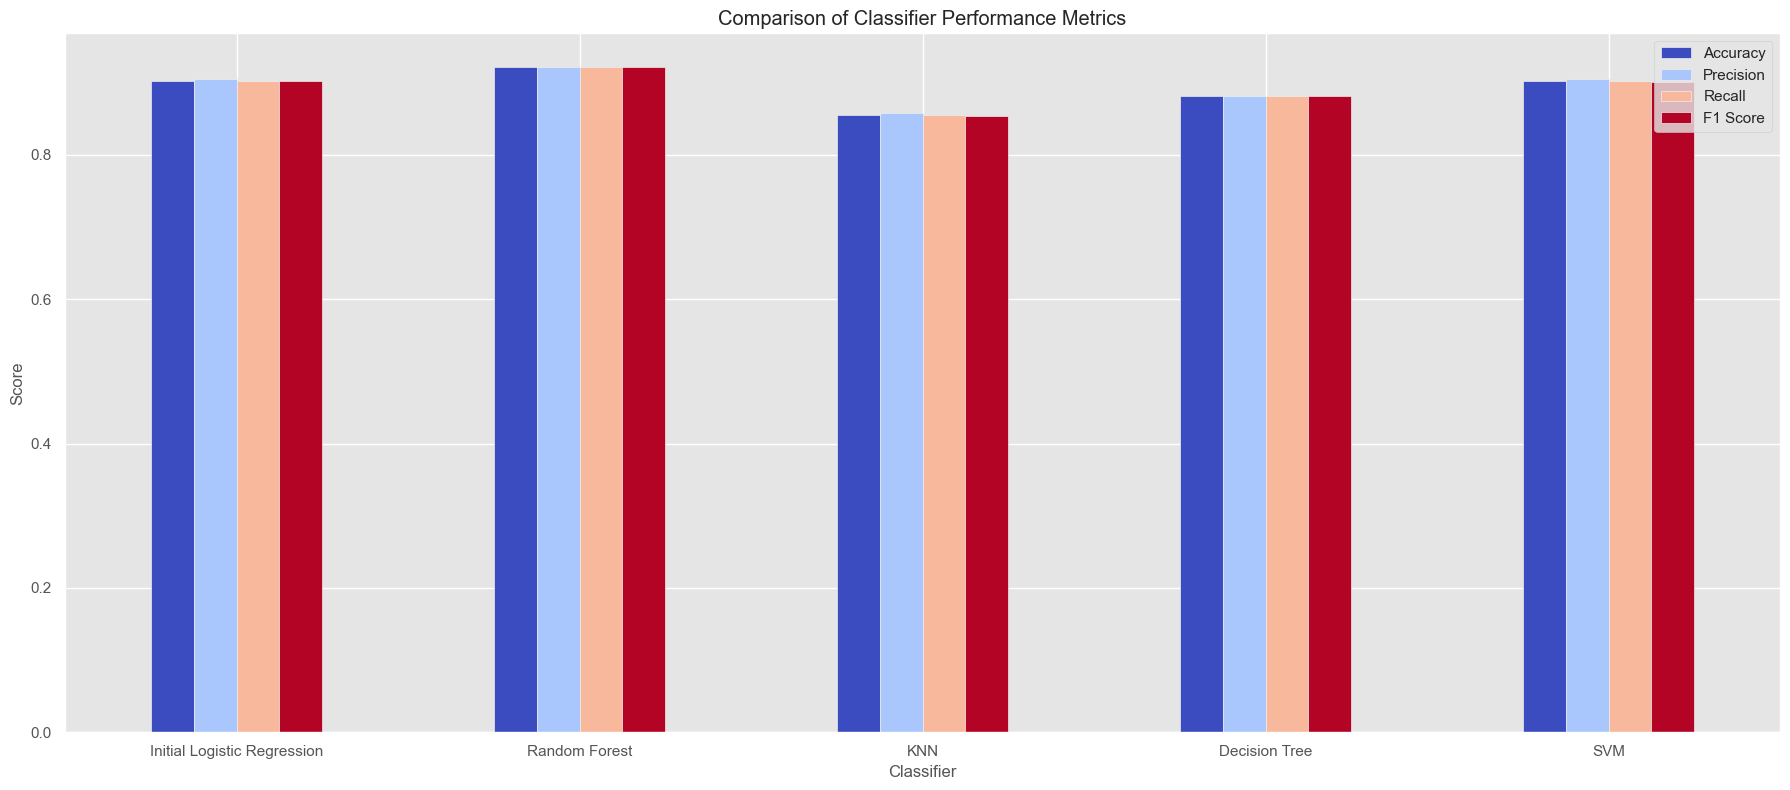

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of all results
results_summary = {
    'Classifier': ['Initial Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [0.9024, 0.9220, 0.8554, 0.8812, 0.9024],
    'Precision': [0.9046, 0.9224, 0.8575, 0.8812, 0.9052],
    'Recall': [0.9024, 0.9220, 0.8554, 0.8812, 0.9024],
    'F1 Score': [0.9023, 0.9219, 0.8537, 0.8812, 0.9015]
}

results_df = pd.DataFrame(results_summary)

# Display the summary table
print(results_df)

# Set the color palette
sns.set_palette("coolwarm")

# Plot the performance metrics
results_df.plot(x='Classifier', kind='bar', figsize=(18, 8), colormap='coolwarm')
plt.title('Comparison of Classifier Performance Metrics')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


<div style="text-align: center;">
    <img src="exo3.png" width="1000" height="400">
</div>


<div style="text-align: center;">
    <span style="font-size: 1.6em; font-weight: bold">Interpretation: Insight & Policy Decision
</span>
</div>

**Overview**
In our journey through the data science lifecycle, we embarked on an exploration of exoplanetary data from the Kepler mission. We conducted extensive preprocessing, exploratory analysis, and machine learning model evaluation to uncover insights about exoplanets. Here, we present our findings, interpretations, and policy recommendations based on the analyses performed.

**Key Findings**
1. Data Preprocessing and Cleaning:
    - We identified and handled missing values, removing columns with excessive missing data to maintain dataset integrity.
    - Features were standardized and encoded to prepare for machine learning algorithms.

2. Exploratory Data Analysis:
    - Disposition Score Distribution: Most exoplanets were either confirmed or identified as false positives, with a smaller number classified as candidates.
    - Orbital Period Distribution: The majority of exoplanets have short orbital periods, with a few extreme outliers indicating very long orbital periods.
    - Planetary Radius Distribution: Most exoplanets are similar in size to Earth, with a few significantly larger outliers.
    - Equilibrium Temperature Distribution: The temperature distribution of exoplanets is skewed, with most exoplanets having lower equilibrium temperatures.

3. Model Evaluation:
    - We evaluated several classifiers, including Logistic Regression, Decision Tree, Random Forest, KNN, and SVM.
    - Random Forest emerged as the top performer with the highest accuracy and F1 score, indicating its robustness in handling the dataset.
    - Hyperparameter tuning improved the performance of Logistic Regression but still lagged behind Random Forest.

**Insights and Interpretations**
1. Exoplanet Dispositions:
    - The high number of false positives indicates that distinguishing between actual exoplanets and other astrophysical phenomena remains a challenge. Improvements in detection algorithms could reduce the false positive rate.
2. Orbital Period and Habitability:
    - The distribution of orbital periods suggests that most exoplanets are close to their stars. For habitability, a balanced distribution with more exoplanets in the habitable zone (neither too close nor too far from their stars) would be ideal. This imbalance may affect the likelihood of finding Earth-like planets.
3. Planetary Sizes and Detection:
    - The concentration of exoplanets with radii similar to Earth but a few significantly larger ones indicates detection biases. Larger planets are easier to detect due to their more pronounced transit signals. Future missions could focus on refining detection techniques to identify smaller, Earth-sized planets more reliably.
4.  Temperature and Potential for Life:
    - Most exoplanets have low equilibrium temperatures, suggesting they orbit further from their stars or have cooler stars. The extreme temperatures at the tail end of the distribution are likely due to outliers, possibly due to detection or measurement anomalies. Identifying planets with moderate temperatures is crucial for finding potentially habitable worlds.

**Policy Recommendations**
1. Enhanced Detection Algorithms:
    - Invest in refining algorithms to reduce the false positive rate. Techniques like machine learning and improved signal processing can enhance the accuracy of exoplanet detections.
2. Focused Missions on Habitable Zones:
    - Future space missions should focus on detecting exoplanets within the habitable zone. Enhancing telescope sensitivity to identify smaller, Earth-sized planets in these zones is crucial.
3. Comprehensive Data Sharing:
    - Promote data sharing and collaboration among international space agencies. Combining datasets and resources can lead to better detection methods and more comprehensive analyses.
4. Public Engagement and Education:
    - Engage the public in exoplanet discoveries through interactive platforms and educational initiatives. Highlighting the importance of these discoveries can generate interest and support for space missions.

**Conclusion**

Our detailed analysis of the Kepler exoplanetary data reveals significant insights into the nature and distribution of exoplanets. While the Random Forest classifier performed best, the journey through various models and optimizations provided a comprehensive understanding of the data. By implementing the recommendations, we can enhance our ability to discover and understand exoplanets, bringing us closer to answering fundamental questions about the universe and the potential for life beyond Earth.